In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv('electricity-usage.csv')
data.head()

,DateTime,Consumption kWh,Off-peak,Mid-peak,On-peak
0,11/25/2011 01:00:00,0.39,1,0,0
1,11/25/2011 02:00:00,0.33,1,0,0
2,11/25/2011 03:00:00,0.27,1,0,0
3,11/25/2011 04:00:00,0.29,1,0,0
4,11/25/2011 05:00:00,0.29,1,0,0


[Wikipedia link describing Peak Demand Terminologies](https://en.wikipedia.org/wiki/Peak_demand#When_is_the_peak_electricity_demand?)

##### Off-Peak: Opposite of On-Peak 
##### On-Peak: Time at which demand is highe than average
##### Mid-Peak: Average Demand

In [3]:
data.set_index(pd.date_range('11/25/2011 01:00:00',freq='H',periods= 2712),inplace=True)

In [4]:
data.head()

,DateTime,Consumption kWh,Off-peak,Mid-peak,On-peak
2011-11-25 01:00:00,11/25/2011 01:00:00,0.39,1,0,0
2011-11-25 02:00:00,11/25/2011 02:00:00,0.33,1,0,0
2011-11-25 03:00:00,11/25/2011 03:00:00,0.27,1,0,0
2011-11-25 04:00:00,11/25/2011 04:00:00,0.29,1,0,0
2011-11-25 05:00:00,11/25/2011 05:00:00,0.29,1,0,0


In [5]:
data.drop(columns=['DateTime'],inplace=True)  ### the original datetime had missing values

In [6]:
data.index

DatetimeIndex(['2011-11-25 01:00:00', '2011-11-25 02:00:00',
               '2011-11-25 03:00:00', '2011-11-25 04:00:00',
               '2011-11-25 05:00:00', '2011-11-25 06:00:00',
               '2011-11-25 07:00:00', '2011-11-25 08:00:00',
               '2011-11-25 09:00:00', '2011-11-25 10:00:00',
               ...
               '2012-03-16 15:00:00', '2012-03-16 16:00:00',
               '2012-03-16 17:00:00', '2012-03-16 18:00:00',
               '2012-03-16 19:00:00', '2012-03-16 20:00:00',
               '2012-03-16 21:00:00', '2012-03-16 22:00:00',
               '2012-03-16 23:00:00', '2012-03-17 00:00:00'],
              dtype='datetime64[ns]', length=2712, freq='H')

In [7]:
data.head()

,Consumption kWh,Off-peak,Mid-peak,On-peak
2011-11-25 01:00:00,0.39,1,0,0
2011-11-25 02:00:00,0.33,1,0,0
2011-11-25 03:00:00,0.27,1,0,0
2011-11-25 04:00:00,0.29,1,0,0
2011-11-25 05:00:00,0.29,1,0,0


In [8]:
training_data= data[:'2012-01-31 23:00:00']

In [9]:
test_data=data['2012-02-01 00:00:00':]
y_test= test_data.iloc[:,0].values

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
var_1= np.array(training_data['Consumption kWh'])
training_data['Consumption kWh']=sc.fit_transform(var_1.reshape(-1,1))

C:\Users\ACER M5\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
x_train= training_data.iloc[0:-1].values
y_train=training_data.iloc[1:,0].values

In [12]:
x_train=x_train.reshape((-1,1,4))

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [14]:
regressor= Sequential()
regressor.add(LSTM(4,activation='relu'))
regressor.add(Dense(1,activation='relu'))
regressor.compile(optimizer='adam',loss='mean_squared_error',metrics=['MAE'])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
regressor.fit(x_train,y_train,batch_size=32,epochs=200)      ### 200 minimum required for convergence

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
1630/1630 [==============================] - 5s 3ms/step - loss: 0.0104 - mean_absolute_error: 0.0560
Epoch 2/200
1630/1630 [==============================] - 1s 563us/step - loss: 0.0101 - mean_absolute_error: 0.0495
Epoch 3/200
1630/1630 [==============================] - 1s 568us/step - loss: 0.0100 - mean_absolute_error: 0.0476
Epoch 4/200
1630/1630 [==============================] - 1s 559us/step - loss: 0.0100 - mean_absolute_error: 0.0482 0s - loss: 0.0099 - mean_absolute_error: 0.04
Epoch 5/200
1630/1630 [==============================] - 1s 595us/step - loss: 0.0099 - mean_absolute_error: 0.0488
Epoch 6/200
1630/1630 [==============================] - 1s 586us/step - loss: 0.0099 - mean_absolute_error: 0.0481
Epoch 7/200
1630/1630 [==============================] - 1s 567us/step - loss: 0.0098 - mean_absolute_error: 0.0485
Epoch 8/200
1630/1630 [==============================] - 1s 654us/step - loss: 0.0098 - mean_abs

1630/1630 [==============================] - 1s 557us/step - loss: 0.0093 - mean_absolute_error: 0.0465 0s - loss: 0.0091 - mean_absolute_erro
Epoch 67/200
1630/1630 [==============================] - 1s 571us/step - loss: 0.0093 - mean_absolute_error: 0.0438
Epoch 68/200
1630/1630 [==============================] - 1s 541us/step - loss: 0.0093 - mean_absolute_error: 0.0472
Epoch 69/200
1630/1630 [==============================] - 1s 545us/step - loss: 0.0093 - mean_absolute_error: 0.0437
Epoch 70/200
1630/1630 [==============================] - 1s 537us/step - loss: 0.0093 - mean_absolute_error: 0.0461
Epoch 71/200
1630/1630 [==============================] - 1s 555us/step - loss: 0.0093 - mean_absolute_error: 0.0452
Epoch 72/200
1630/1630 [==============================] - 1s 547us/step - loss: 0.0093 - mean_absolute_error: 0.0460
Epoch 73/200
1630/1630 [==============================] - 1s 568us/step - loss: 0.0093 - mean_absolute_error: 0.0449
Epoch 74/200
1630/1630 [==============

1630/1630 [==============================] - 1s 548us/step - loss: 0.0093 - mean_absolute_error: 0.0453
Epoch 133/200
1630/1630 [==============================] - 1s 552us/step - loss: 0.0093 - mean_absolute_error: 0.0456
Epoch 134/200
1630/1630 [==============================] - 1s 546us/step - loss: 0.0092 - mean_absolute_error: 0.0446
Epoch 135/200
1630/1630 [==============================] - 1s 535us/step - loss: 0.0092 - mean_absolute_error: 0.0447
Epoch 136/200
1630/1630 [==============================] - 1s 540us/step - loss: 0.0093 - mean_absolute_error: 0.0457
Epoch 137/200
1630/1630 [==============================] - 1s 553us/step - loss: 0.0092 - mean_absolute_error: 0.0451
Epoch 138/200
1630/1630 [==============================] - 1s 542us/step - loss: 0.0093 - mean_absolute_error: 0.0457
Epoch 139/200
1630/1630 [==============================] - 1s 546us/step - loss: 0.0092 - mean_absolute_error: 0.0450
Epoch 140/200
1630/1630 [==============================] - 1s 560us/st

1630/1630 [==============================] - 1s 555us/step - loss: 0.0091 - mean_absolute_error: 0.0442


In [16]:
sc_1=MinMaxScaler()
var_2= np.array(test_data['Consumption kWh'])
test_data['Consumption kWh']=sc_1.fit_transform(var_2.reshape(-1,1))

C:\Users\ACER M5\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
test_data=test_data.values
test_data=test_data.reshape((-1,1,4))
y_test=sc_1.inverse_transform(y_test.reshape(-1,1))

In [18]:
predicted_values=regressor.predict(test_data)

In [19]:
predicted_values

array([[0.06249023],
       [0.0606397 ],
       [0.05567632],
       ...,
       [0.06310577],
       [0.05692107],
       [0.05380432]], dtype=float32)

In [20]:
original_predicted_values= sc_1.inverse_transform(predicted_values)

In [21]:
original_predicted_values

array([[0.5655741 ],
       [0.5559328 ],
       [0.5300736 ],
       ...,
       [0.568781  ],
       [0.53655875],
       [0.5203205 ]], dtype=float32)

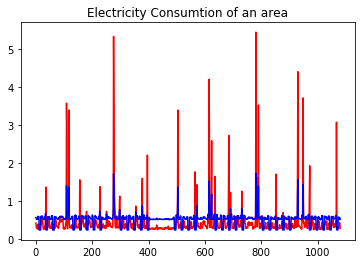

In [26]:
plt.plot(y_test,color='red',label='Real Consumption for final 3 months')
plt.Figure(figsize=(20,20))
plt.plot(original_predicted_values,color='blue',label='Predicted Consumption for final 3 months')
plt.title('Electricity Consumtion of an area')
plt.show()


In [27]:
import math
from sklearn.metrics import mean_squared_error
rmse= math.sqrt(mean_squared_error(y_test,original_predicted_values))
result= np.mean(rmse)
                

In [28]:
result


0.3893995136580415